In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
print("Train img set shape", train_images.shape)
print("Test set shape", test_images.shape)

Train img set shape (60000, 28, 28)
Test set shape (10000, 28, 28)


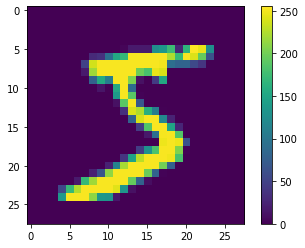

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

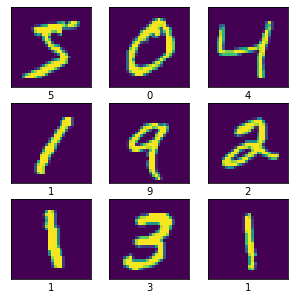

In [7]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2249 - accuracy: 0.9341
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 0.0924 - accuracy: 0.97 - 5s 86us/sample - loss: 0.0924 - accuracy: 0.9723
Epoch 3/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0622 - accuracy: 0.9805
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0437 - accuracy: 0.9867
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0336 - accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0234 - accuracy: 0.9928
Epoch 7/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0202 - accuracy: 0.9937
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0155 - accuracy: 0.9949
Epoch 9/10
60000/60000 [==============================] - 5s 88us/sample - loss

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0878 - accuracy: 0.9785

Test accuracy: 0.9785


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[2]

array([7.2108852e-10, 9.9993646e-01, 7.9160998e-07, 1.1732388e-08,
       3.5084918e-06, 1.3920120e-09, 1.1169924e-06, 7.6280621e-06,
       5.0482711e-05, 7.6573026e-10], dtype=float32)

In [17]:
np.argmax(predictions[3])

0

In [18]:
test_labels[3]

0

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

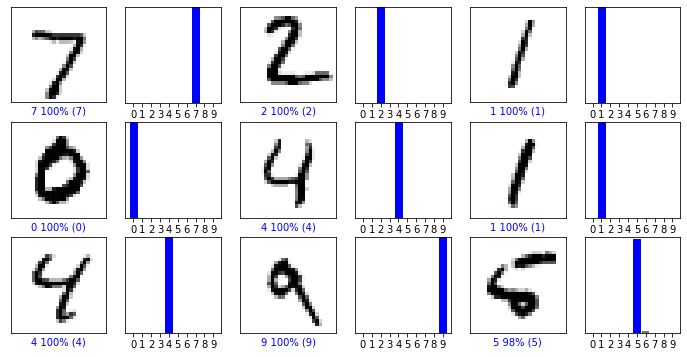

In [20]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
#plt.tight_layout()
plt.show()